In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"E:\4 SEMESTRE\IA\aula\auto-mpg.csv",sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


<Axes: >

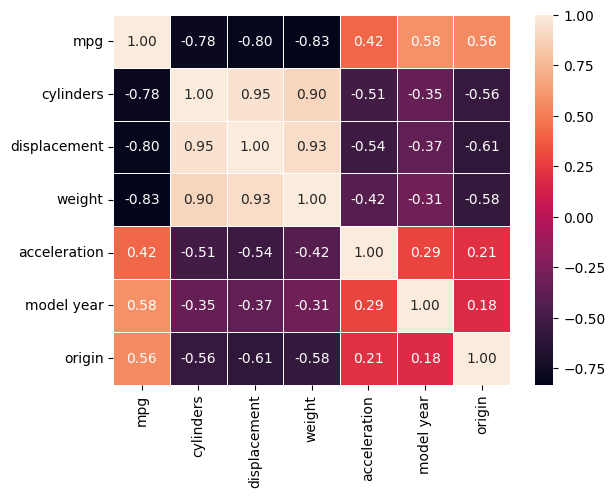

In [48]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True,fmt=".2f", linewidth=.5)

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Remover registros com valores inválidos ou ausentes
df = df.replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Selecionar as variáveis independentes (excluindo 'mpg' e 'car name')
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prever os valores no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro quadrático médio
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Obter os coeficientes do modelo
coef = model.coef_
intercept = model.intercept_

print(f'RMSE: {rmse}')
print(f'Coeficientes: {coef}')
print(f'Intercepto: {intercept}')


RMSE: 3.2727457003009515
Coeficientes: [-0.34578883  0.01510871 -0.02130175 -0.00614163  0.03795001  0.76774258
  1.61345707]
Intercepto: -18.49936112872476


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Remover registros com valores inválidos ou ausentes
df = df.replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Selecionar as variáveis independentes (excluindo 'mpg' e 'car name')
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression(fit_intercept=True, alpha=0.1,n_jobs=1,copy_X=True)
model.fit(X_train, y_train)

# Prever os valores no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro quadrático médio
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Exibir o RMSE
print(f'RMSE: {rmse}')

# Gerar o gráfico de valores reais vs previsões
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Valores Reais (MPG)')
plt.ylabel('Forecast (MPG)')
plt.title('Regressão Linear: Forecast vs Valores Reais')
plt.grid(True)
plt.show()


TypeError: LinearRegression.__init__() got an unexpected keyword argument 'alpha'

Parâmetros: fit_intercept=True, normalize=True, copy_X=True | RMSE: 3.2727457003009564
Parâmetros: fit_intercept=True, normalize=True, copy_X=False | RMSE: 3.2727457003009564
Parâmetros: fit_intercept=True, normalize=False, copy_X=True | RMSE: 3.2727457003009515
Parâmetros: fit_intercept=False, normalize=True, copy_X=True | RMSE: 23.560599515229953
Parâmetros: fit_intercept=False, normalize=False, copy_X=True | RMSE: 3.3145499811628616
Parâmetros: fit_intercept=False, normalize=True, copy_X=False | RMSE: 23.560599515229953
Parâmetros: fit_intercept=True, normalize=False, copy_X=False | RMSE: 3.2727457003009515
Parâmetros: fit_intercept=False, normalize=False, copy_X=False | RMSE: 3.3145499811628616

Melhor combinação de parâmetros: fit_intercept=True, normalize=False, copy_X=True | RMSE: 3.2727457003009515


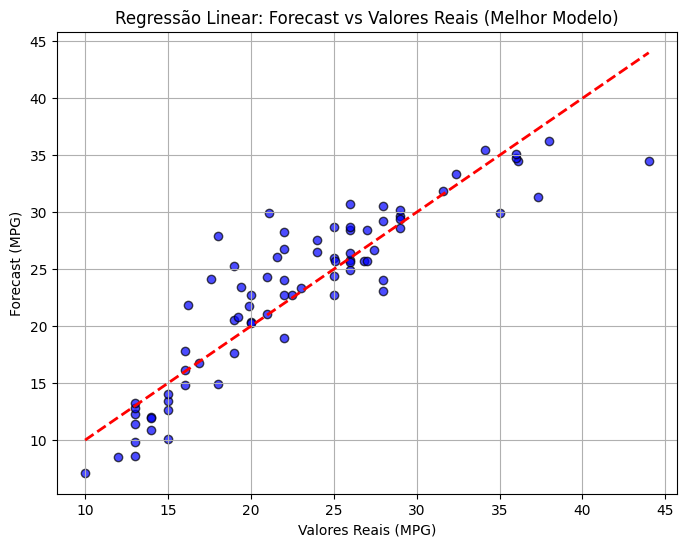

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Remover registros com valores inválidos ou ausentes
df = df.replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Selecionar as variáveis independentes (excluindo 'mpg' e 'car name')
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para testar o modelo com diferentes parâmetros
def testar_modelo(fit_intercept, normalize, copy_X):
    # Se normalize for True, aplicar a normalização
    if normalize:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Criar e treinar o modelo de regressão linear com os parâmetros especificados
    model = LinearRegression(fit_intercept=fit_intercept, copy_X=copy_X)
    model.fit(X_train_scaled, y_train)

    # Prever os valores no conjunto de teste
    y_pred = model.predict(X_test_scaled)

    # Calcular o erro quadrático médio
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Parâmetros: fit_intercept={fit_intercept}, normalize={normalize}, copy_X={copy_X} | RMSE: {rmse}")
    return rmse

# Testar combinações de parâmetros
combinacoes_parametros = [
    (True, True, True),
    (True, True, False),
    (True, False, True),
    (False, True, True),
    (False, False, True),
    (False, True, False),
    (True, False, False),
    (False, False, False)
]

# Avaliar cada combinação
resultados = []
for fit_intercept, normalize, copy_X in combinacoes_parametros:
    rmse = testar_modelo(fit_intercept, normalize, copy_X)
    resultados.append((fit_intercept, normalize, copy_X, rmse))

# Encontrar a melhor combinação de parâmetros
melhor_comb = min(resultados, key=lambda x: x[3])

print(f"\nMelhor combinação de parâmetros: fit_intercept={melhor_comb[0]}, normalize={melhor_comb[1]}, copy_X={melhor_comb[2]} | RMSE: {melhor_comb[3]}")

# Gerar o gráfico de valores reais vs previsões usando a melhor configuração
melhor_modelo = LinearRegression(fit_intercept=melhor_comb[0], copy_X=melhor_comb[2])
melhor_modelo.fit(X_train, y_train)
y_pred_melhor = melhor_modelo.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_melhor, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Valores Reais (MPG)')
plt.ylabel('Forecast (MPG)')
plt.title('Regressão Linear: Forecast vs Valores Reais (Melhor Modelo)')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Remover registros com valores inválidos ou ausentes
df = df.replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Selecionar as variáveis independentes (excluindo 'mpg' e 'car name')
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo de regressão linear
model = LinearRegression(fit_intercept=True, copy_X=True)
model.fit(X_train_scaled, y_train)

# Prever os valores no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Calcular o erro quadrático médio (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Exibir o RMSE
print(f'RMSE: {rmse}')

# Gerar o gráfico de valores reais vs previsões
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Valores Reais (MPG)')
plt.ylabel('Forecast (MPG)')
plt.title('Regressão Linear: Forecast vs Valores Reais')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Remover registros com valores inválidos ou ausentes
df = df.replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Selecionar as variáveis independentes (excluindo 'mpg' e 'car name')
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Dividir em conjunto de treino e teste (Percentage Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para testar o modelo com diferentes parâmetros
def testar_modelo(fit_intercept, normalize, copy_X):
    # Se normalize for True, aplicar a normalização
    if normalize:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Criar e treinar o modelo de regressão linear com os parâmetros especificados
    model = LinearRegression(fit_intercept=fit_intercept, copy_X=copy_X)
    model.fit(X_train_scaled, y_train)

    # Prever os valores no conjunto de teste
    y_pred = model.predict(X_test_scaled)

    # Calcular o erro quadrático médio
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Parâmetros: fit_intercept={fit_intercept}, normalize={normalize}, copy_X={copy_X} | RMSE: {rmse}")
    return rmse

# Testar combinações de parâmetros
combinacoes_parametros = [
    (True, True, True),
    (True, True, False),
    (True, False, True),
    (False, True, True),
    (False, False, True),
    (False, True, False),
    (True, False, False),
    (False, False, False)
]

# Avaliar cada combinação
resultados = []
for fit_intercept, normalize, copy_X in combinacoes_parametros:
    rmse = testar_modelo(fit_intercept, normalize, copy_X)
    resultados.append((fit_intercept, normalize, copy_X, rmse))

# Encontrar a melhor combinação de parâmetros
melhor_comb = min(resultados, key=lambda x: x[3])

print(f"\nMelhor combinação de parâmetros: fit_intercept={melhor_comb[0]}, normalize={melhor_comb[1]}, copy_X={melhor_comb[2]} | RMSE: {melhor_comb[3]}")

# Cross Validation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression(fit_intercept=melhor_comb[0], copy_X=melhor_comb[2])
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f"\nCross Validation RMSE: {cv_rmse}")
print(f"Média RMSE da Cross Validation: {cv_rmse.mean()}")

# Gerar o gráfico de valores reais vs previsões usando a melhor configuração
melhor_modelo = LinearRegression(fit_intercept=melhor_comb[0], copy_X=melhor_comb[2])
melhor_modelo.fit(X_train, y_train)
y_pred_melhor = melhor_modelo.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_melhor, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Valores Reais (MPG)')
plt.ylabel('Forecast (MPG)')
plt.title('Regressão Linear: Forecast vs Valores Reais (Melhor Modelo)')
plt.grid(True)
plt.show()


RMSE: 3.2727457003009515


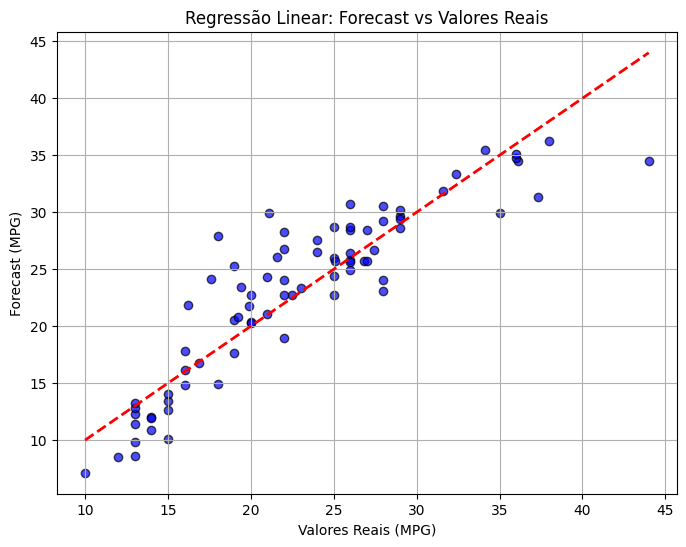

In [10]:
#SEM NORMALIZAÇÃO

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Remover registros com valores inválidos ou ausentes
df = df.replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Selecionar as variáveis independentes (excluindo 'mpg' e 'car name')
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression(fit_intercept=True, copy_X=True)
model.fit(X_train, y_train)

# Prever os valores no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro quadrático médio (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Exibir o RMSE
print(f'RMSE: {rmse}')

# Gerar o gráfico de valores reais vs previsões
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Valores Reais (MPG)')
plt.ylabel('Forecast (MPG)')
plt.title('Regressão Linear: Forecast vs Valores Reais')
plt.grid(True)
plt.show()


In [6]:
#SUPPLY TEST

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Exemplo de dataset com uma linha para testar o modelo
# Inclui colunas de: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
'''test_data = pd.DataFrame({
    'cylinders': [4],
    'displacement': [140.0],
    'horsepower': [90.0],
    'weight': [2264],
    'acceleration': [15.5],
    'model year': [76],
    'origin': [1]
})'''

test_data = pd.DataFrame({(r'E:\4 SEMESTRE\IA')})

# Apenas dividindo o dataset original de treino em treino e teste
# Remover registros com valores inválidos ou ausentes
df = df.replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Selecionar as variáveis independentes (excluindo 'mpg' e 'car name')
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression(fit_intercept=True, copy_X=True)
model.fit(X_train, y_train)

# Prever os valores no conjunto de teste (usando o dataset de uma linha que criamos)
y_pred_test_data = model.predict(test_data)

# Exibir o resultado da previsão
print(f'Previsão para o conjunto de teste (uma linha): {y_pred_test_data[0]}')

# Calcular o erro quadrático médio (RMSE) no conjunto de teste original
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Exibir o RMSE
print(f'RMSE no conjunto de teste original: {rmse}')

# Gerar o gráfico de valores reais vs previsões
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Valores Reais (MPG)')
plt.ylabel('Forecast (MPG)')
plt.title('Regressão Linear: Forecast vs Valores Reais')
plt.grid(True)
plt.show()


c:\Users\Morae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'E:\\4 SEMESTRE\\IA'

In [34]:
##TEST SUPLY 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Carregar dados de um arquivo CSV para o conjunto de teste
# Certifique-se de que o arquivo CSV contém as colunas: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
test_data = pd.read_csv(r'E:\4 SEMESTRE\IA\auto-mpg.csv')

# Verificar se os dados foram carregados corretamente
print("Dados de teste carregados:")
print(test_data.head())

# Supondo que você já tem um DataFrame 'df' com os dados originais
# Remover registros com valores inválidos ou ausentes
df = df.replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Selecionar as variáveis independentes (excluindo 'mpg' e 'car name')
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression(fit_intercept=True, copy_X=True)
model.fit(X_train, y_train)

# Prever os valores no conjunto de teste (usando o dataset carregado do CSV)
y_pred_test_data = model.predict(test_data)

# Exibir o resultado da previsão
print(f'Previsão para o conjunto de teste do CSV com uma única linha: {y_pred_test_data}')

# Calcular o erro quadrático médio (RMSE) no conjunto de teste original
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Exibir o RMSE
print(f'RMSE no conjunto de teste original: {rmse}')

# Gerar o gráfico de valores reais vs previsões
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Valores Reais (MPG)')
plt.ylabel('Forecast (MPG)')
plt.title('Regressão Linear: Forecast vs Valores Reais')
plt.grid(True)
plt.show()


Dados de teste carregados:
   mpg  cylinders  displacement  horsepower  weight  acceleration  model year  \
0   18          8           318         150    3436            11          70   

   origin            car name  
0       1  plymouth satellite  


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- car name
- mpg


MPG real (teste): 18, MPG previsto (teste): 15.999298879274331


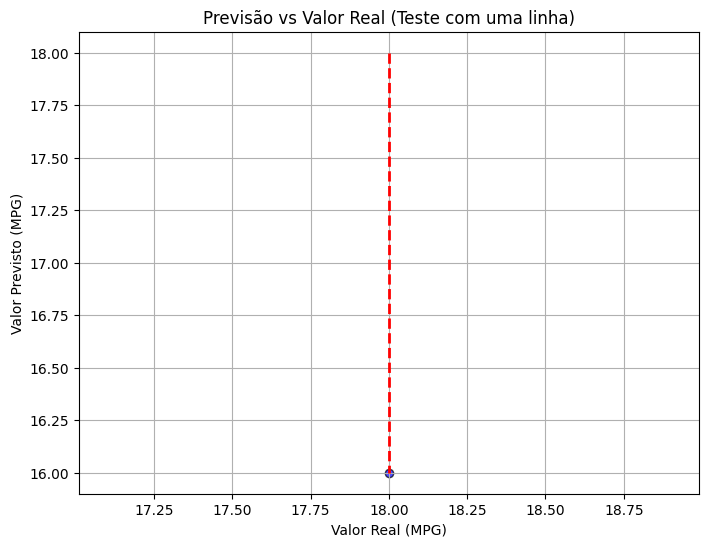

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset completo para treino
train_df = pd.read_csv(r'E:\4 SEMESTRE\IA\aula\auto-mpg.csv')

# Carregar o dataset menor para teste (apenas uma linha)
test_df = pd.read_csv(r'E:\4 SEMESTRE\IA\auto-mpg.csv')

# Remover registros inválidos ou ausentes no dataset de treino
train_df = train_df.replace('?', np.nan)
train_df['horsepower'] = pd.to_numeric(train_df['horsepower'], errors='coerce')
train_df = train_df.dropna()

# Selecionar as variáveis independentes e a dependente no dataset de treino
X_train = train_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y_train = train_df['mpg']

# Criar e treinar o modelo de regressão linear com o dataset completo
model = LinearRegression(fit_intercept=False, copy_X=False)
model.fit(X_train, y_train)

# No dataset de teste (com apenas uma linha), selecionar as mesmas variáveis independentes
X_test = test_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y_test = test_df['mpg']

# Fazer a previsão usando o dataset de teste
y_pred = model.predict(X_test)

# Mostrar o valor real e o previsto para o dataset de teste
y_test_actual = y_test.values[0]
y_test_predicted = y_pred[0]
print(f"MPG real (teste): {y_test_actual}, MPG previsto (teste): {y_test_predicted}")

# Gerar um gráfico de previsão vs valor real (mesmo sendo só uma linha)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_test_predicted, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_actual, y_test_actual], [y_test_actual, y_test_predicted], color='red', linestyle='--', lw=2)
plt.xlabel('Valor Real (MPG)')
plt.ylabel('Valor Previsto (MPG)')
plt.title('Previsão vs Valor Real (Teste com uma linha)')
plt.grid(True)
plt.show()


MPG real (teste): 18, MPG previsto (teste): 15.000958653550791


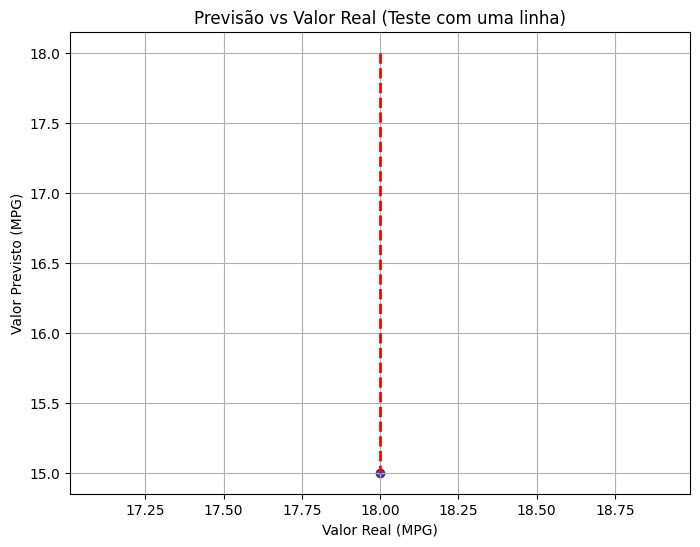

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset completo para treino
train_df = pd.read_csv(r'E:\4 SEMESTRE\IA\aula\auto-mpg.csv')

# Carregar o dataset menor para teste (apenas uma linha)
test_df = pd.read_csv(r'E:\4 SEMESTRE\IA\auto-mpg.csv')

# Remover registros inválidos ou ausentes no dataset de treino
train_df = train_df.replace('?', np.nan)
train_df['horsepower'] = pd.to_numeric(train_df['horsepower'], errors='coerce')
train_df = train_df.dropna()

# Selecionar as variáveis independentes e a dependente no dataset de treino
X_train = train_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y_train = train_df['mpg']

# No dataset de teste (com apenas uma linha), selecionar as mesmas variáveis independentes
X_test = test_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y_test = test_df['mpg']

# Normalizar os dados de treino e teste
scaler = StandardScaler()

# Ajustar o scaler ao conjunto de treino e transformar o conjunto de treino
X_train_scaled = scaler.fit_transform(X_train)

# Transformar o conjunto de teste com o mesmo scaler
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo de regressão linear com o dataset normalizado
model = LinearRegression(fit_intercept=True, copy_X=True)
model.fit(X_train_scaled, y_train)

# Fazer a previsão usando o dataset de teste normalizado
y_pred = model.predict(X_test_scaled)

# Mostrar o valor real e o previsto para o dataset de teste
y_test_actual = y_test.values[0]
y_test_predicted = y_pred[0]
print(f"MPG real (teste): {y_test_actual}, MPG previsto (teste): {y_test_predicted}")

# Gerar um gráfico de previsão vs valor real (mesmo sendo só uma linha)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_test_predicted, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_actual, y_test_actual], [y_test_actual, y_test_predicted], color='red', linestyle='--', lw=2)
plt.xlabel('Valor Real (MPG)')
plt.ylabel('Valor Previsto (MPG)')
plt.title('Previsão vs Valor Real (Teste com uma linha)')
plt.grid(True)
plt.show()


MPG real (teste): 18, MPG previsto (teste): 15.999298879274331
Mean Absolute Error (MAE): 2.000701120725669


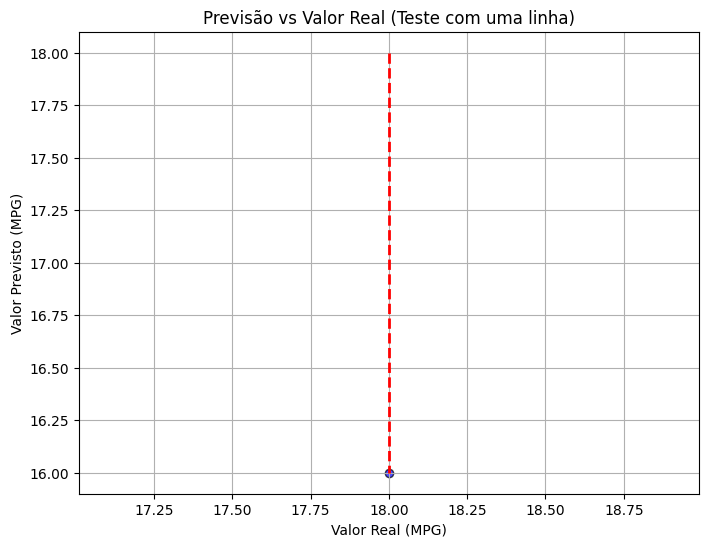

In [70]:
#MAE NAO NORMALIZADO
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset completo para treino
train_df = pd.read_csv(r'E:\4 SEMESTRE\IA\aula\auto-mpg.csv')

# Carregar o dataset menor para teste (apenas uma linha)
test_df = pd.read_csv(r'E:\4 SEMESTRE\IA\auto-mpg.csv')

# Remover registros inválidos ou ausentes no dataset de treino
train_df = train_df.replace('?', np.nan)
train_df['horsepower'] = pd.to_numeric(train_df['horsepower'], errors='coerce')
train_df = train_df.dropna()

# Selecionar as variáveis independentes e a dependente no dataset de treino
X_train = train_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y_train = train_df['mpg']

# Criar e treinar o modelo de regressão linear com o dataset completo
model = LinearRegression(fit_intercept=False, copy_X=False)
model.fit(X_train, y_train)

# No dataset de teste (com apenas uma linha), selecionar as mesmas variáveis independentes
X_test = test_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y_test = test_df['mpg']

# Fazer a previsão usando o dataset de teste
y_pred = model.predict(X_test)

# Mostrar o valor real e o previsto para o dataset de teste
y_test_actual = y_test.values[0]
y_test_predicted = y_pred[0]
print(f"MPG real (teste): {y_test_actual}, MPG previsto (teste): {y_test_predicted}")

# Calcular o MAE
mae = mean_absolute_error([y_test_actual], [y_test_predicted])
print(f"Mean Absolute Error (MAE): {mae}")

# Gerar um gráfico de previsão vs valor real (mesmo sendo só uma linha)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_test_predicted, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_actual, y_test_actual], [y_test_actual, y_test_predicted], color='red', linestyle='--', lw=2)
plt.xlabel('Valor Real (MPG)')
plt.ylabel('Valor Previsto (MPG)')
plt.title('Previsão vs Valor Real (Teste com uma linha)')
plt.grid(True)
plt.show()


MPG real (teste): 18, MPG previsto (teste): 15.000958653550791
Mean Absolute Error (MAE): 2.999041346449209


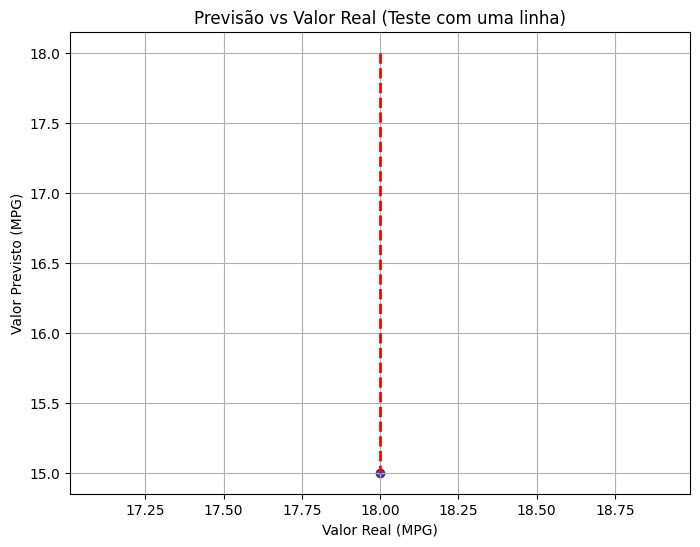

In [53]:
#MAE NORMALIZADO

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset completo para treino
train_df = pd.read_csv(r'E:\4 SEMESTRE\IA\aula\auto-mpg.csv')

# Carregar o dataset menor para teste (apenas uma linha)
test_df = pd.read_csv(r'E:\4 SEMESTRE\IA\auto-mpg.csv')

# Remover registros inválidos ou ausentes no dataset de treino
train_df = train_df.replace('?', np.nan)
train_df['horsepower'] = pd.to_numeric(train_df['horsepower'], errors='coerce')
train_df = train_df.dropna()

# Selecionar as variáveis independentes e a dependente no dataset de treino
X_train = train_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y_train = train_df['mpg']

# No dataset de teste (com apenas uma linha), selecionar as mesmas variáveis independentes
X_test = test_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y_test = test_df['mpg']

# Normalizar os dados de treino e teste
scaler = StandardScaler()

# Ajustar o scaler ao conjunto de treino e transformar o conjunto de treino
X_train_scaled = scaler.fit_transform(X_train)

# Transformar o conjunto de teste com o mesmo scaler
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo de regressão linear com o dataset normalizado
model = LinearRegression(fit_intercept=True, copy_X=True)
model.fit(X_train_scaled, y_train)

# Fazer a previsão usando o dataset de teste normalizado
y_pred = model.predict(X_test_scaled)

# Mostrar o valor real e o previsto para o dataset de teste
y_test_actual = y_test.values[0]
y_test_predicted = y_pred[0]
print(f"MPG real (teste): {y_test_actual}, MPG previsto (teste): {y_test_predicted}")

# Calcular o MAE
mae = mean_absolute_error([y_test_actual], [y_test_predicted])
print(f"Mean Absolute Error (MAE): {mae}")

# Gerar um gráfico de previsão vs valor real (mesmo sendo só uma linha)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_test_predicted, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_actual, y_test_actual], [y_test_actual, y_test_predicted], color='red', linestyle='--', lw=2)
plt.xlabel('Valor Real (MPG)')
plt.ylabel('Valor Previsto (MPG)')
plt.title('Previsão vs Valor Real (Teste com uma linha)')
plt.grid(True)
plt.show()


MPG real (teste): 26.0, MPG previsto (teste): 26.791346645933583
MPG real (teste): 21.6, MPG previsto (teste): 25.48995240315835
MPG real (teste): 36.1, MPG previsto (teste): 34.51403870740262
MPG real (teste): 26.0, MPG previsto (teste): 25.620642989811007
MPG real (teste): 27.0, MPG previsto (teste): 28.014400832897593
MPG real (teste): 28.0, MPG previsto (teste): 30.75048354669774
MPG real (teste): 13.0, MPG previsto (teste): 9.287760053924286
MPG real (teste): 26.0, MPG previsto (teste): 30.49066099909636
MPG real (teste): 19.0, MPG previsto (teste): 21.09898078162013
MPG real (teste): 29.0, MPG previsto (teste): 29.454198983638243
MPG real (teste): 15.0, MPG previsto (teste): 13.157037479356868
MPG real (teste): 19.0, MPG previsto (teste): 24.86483422818352
MPG real (teste): 16.9, MPG previsto (teste): 15.647818000382065
MPG real (teste): 29.0, MPG previsto (teste): 30.122866487987107
MPG real (teste): 16.2, MPG previsto (teste): 20.781310583837723
MPG real (teste): 28.0, MPG prev

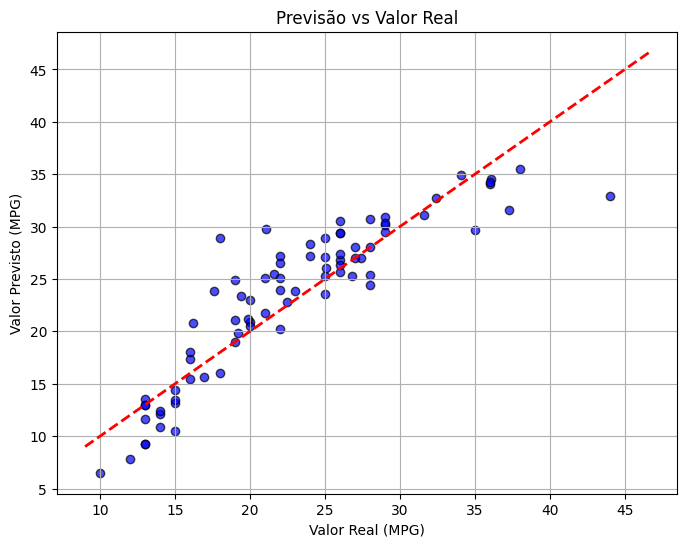

In [69]:
#SEM NORMALIZER
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o dataset completo
df = pd.read_csv(r'E:\4 SEMESTRE\IA\aula\auto-mpg.csv')

# Remover registros inválidos ou ausentes
df = df.replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Selecionar as variáveis independentes e a dependente
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression(fit_intercept=False, copy_X=False)
model.fit(X_train, y_train)

# Fazer a previsão usando o dataset de teste
y_pred = model.predict(X_test)

# Mostrar o valor real e o previsto para o dataset de teste
for actual, predicted in zip(y_test, y_pred):
    print(f"MPG real (teste): {actual}, MPG previsto (teste): {predicted}")

# Calcular o MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcular o R²
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Correção (R²): {r2}")

# Gerar um gráfico de previsão vs valor real
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Valor Real (MPG)')
plt.ylabel('Valor Previsto (MPG)')
plt.title('Previsão vs Valor Real')
plt.grid(True)
plt.show()


MPG real (teste): 26.0, MPG previsto (teste): 25.841561532421835
MPG real (teste): 21.6, MPG previsto (teste): 26.036744541256716
MPG real (teste): 36.1, MPG previsto (teste): 34.506018371746805
MPG real (teste): 26.0, MPG previsto (teste): 24.89553186898922
MPG real (teste): 27.0, MPG previsto (teste): 28.425987074049104
MPG real (teste): 28.0, MPG previsto (teste): 30.561382369465484
MPG real (teste): 13.0, MPG previsto (teste): 8.586942617298456
MPG real (teste): 26.0, MPG previsto (teste): 30.721856199164662
MPG real (teste): 19.0, MPG previsto (teste): 20.55678574326613
MPG real (teste): 29.0, MPG previsto (teste): 28.646823455546343
MPG real (teste): 15.0, MPG previsto (teste): 12.612149020562104
MPG real (teste): 19.0, MPG previsto (teste): 25.264346501512993
MPG real (teste): 16.9, MPG previsto (teste): 16.773696216235944
MPG real (teste): 29.0, MPG previsto (teste): 29.68019379069264
MPG real (teste): 16.2, MPG previsto (teste): 21.82299683165873
MPG real (teste): 28.0, MPG pr

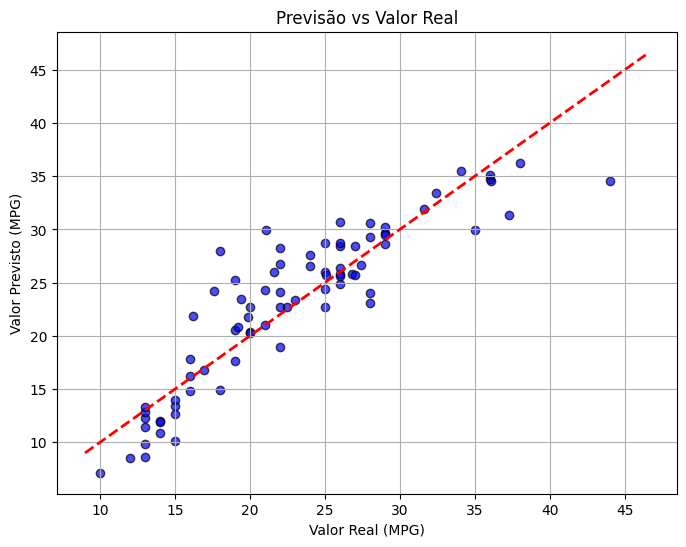

In [67]:
#COM NORMALIZER
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o dataset completo para treino
df = pd.read_csv(r'E:\4 SEMESTRE\IA\aula\auto-mpg.csv')

# Remover registros inválidos ou ausentes
df = df.replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Selecionar as variáveis independentes e a dependente
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados de treino e teste
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo de regressão linear
model = LinearRegression(fit_intercept=True, copy_X=True)
model.fit(X_train_scaled, y_train)

# Fazer a previsão usando o dataset de teste normalizado
y_pred = model.predict(X_test_scaled)

# Mostrar o valor real e o previsto para o dataset de teste
for actual, predicted in zip(y_test, y_pred):
    print(f"MPG real (teste): {actual}, MPG previsto (teste): {predicted}")

# Calcular o MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcular o R²
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Correção (R²): {r2}")

# Gerar um gráfico de previsão vs valor real
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Valor Real (MPG)')
plt.ylabel('Valor Previsto (MPG)')
plt.title('Previsão vs Valor Real')
plt.grid(True)
plt.show()

